In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def add_watermark(ax, text):
    ax.text(0.5, 0.5, text, alpha=0.3, fontsize=50, color='gray',
            rotation=0, ha='center', va='center', transform=ax.transAxes)

In [3]:

def prepare_data(filename):
    # Read data from file
    columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
    data = pd.read_csv(filename, names=columns)
    
    # Encode categorical variable 'Sex'
    label_encoder = LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    
    # Split data into features and target
    X = data.drop("Sex", axis=1)
    y = data['Sex']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [4]:

def evaluate_performance(classifier, y_true, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Classification report
    cr_dict = classification_report(y_true, y_pred, zero_division=0, output_dict=True)
    cr_df = pd.DataFrame(cr_dict).transpose()
    
    # Print results
    print(classifier + ":")
    print("Confusion Matrix:\n", cm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    return cm, cr_df

In [5]:
def plot_confusion_matrix(cm, classifier):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix for ' + classifier)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    add_watermark(plt.gca(), '2021SE56')
    plt.show()

In [6]:

def apply_knn(filename):
    # Prepare data
    X_train, X_test, y_train, y_test = prepare_data(filename)
    
    # Apply KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Evaluate
    cm, cr = evaluate_performance("K-Nearest Neighbors (KNN) Classifier", y_test, y_pred)
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, "K-Nearest Neighbors (KNN) Classifier")
    
    # Display classification report
    print("Classification Report:")
    print(cr)

In [7]:
def apply_naive_bayes(filename):
    # Prepare data
    X_train, X_test, y_train, y_test = prepare_data(filename)
    
    # Apply Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    
    # Evaluate
    cm, cr = evaluate_performance("Naive Bayes Classifier", y_test, y_pred)
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, "Naive Bayes Classifier")
    
    # Display classification report
    print("Classification Report:")
    print(cr)

K-Nearest Neighbors (KNN) Classifier:
Confusion Matrix:
 [[126  27 109]
 [ 40 198  29]
 [122  46 139]]
Accuracy: 0.5538277511961722
Precision: 0.5547328258366705
Recall: 0.5538277511961722
F1-score: 0.5534831678988429


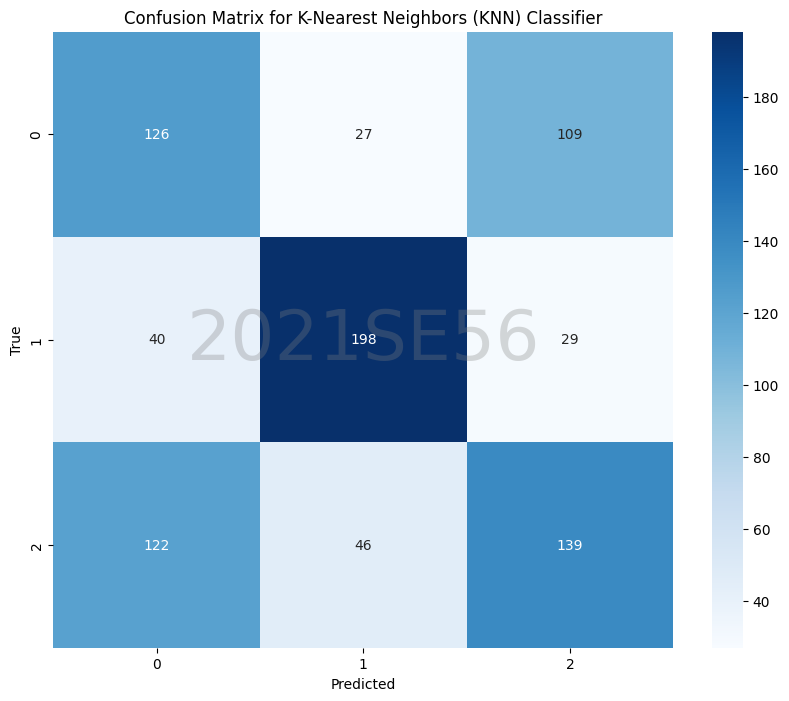

Classification Report:
              precision    recall  f1-score     support
0              0.437500  0.480916  0.458182  262.000000
1              0.730627  0.741573  0.736059  267.000000
2              0.501805  0.452769  0.476027  307.000000
accuracy       0.553828  0.553828  0.553828    0.553828
macro avg      0.556644  0.558419  0.556756  836.000000
weighted avg   0.554733  0.553828  0.553483  836.000000


In [8]:
# Call functions with your data file
apply_knn("dataset/abalone.data")

Naive Bayes Classifier:
Confusion Matrix:
 [[170  48  44]
 [ 20 225  22]
 [192  72  43]]
Accuracy: 0.5239234449760766
Precision: 0.49262845115367393
Recall: 0.5239234449760766
F1-score: 0.4762115513541513


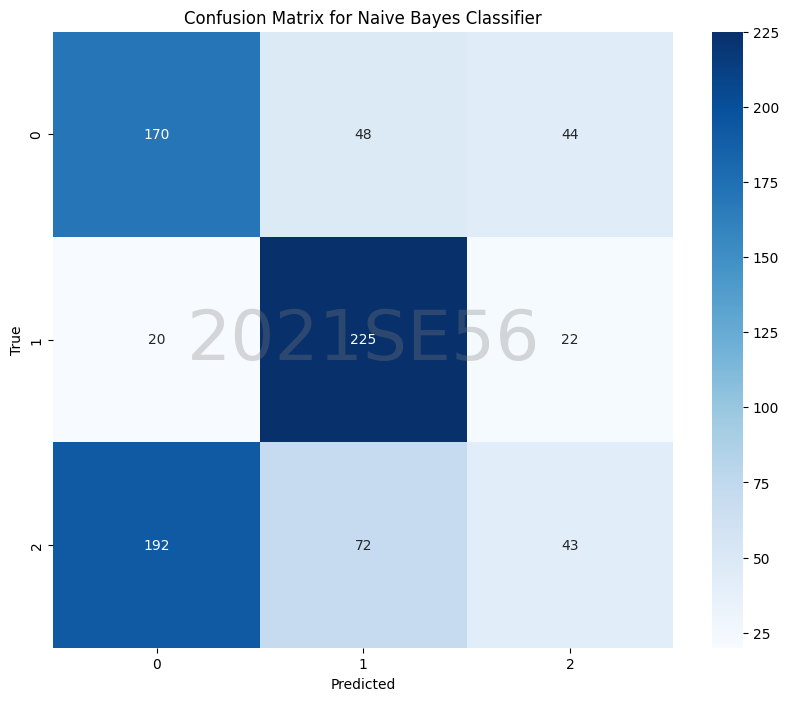

Classification Report:
              precision    recall  f1-score     support
0              0.445026  0.648855  0.527950  262.000000
1              0.652174  0.842697  0.735294  267.000000
2              0.394495  0.140065  0.206731  307.000000
accuracy       0.523923  0.523923  0.523923    0.523923
macro avg      0.497232  0.543872  0.489992  836.000000
weighted avg   0.492628  0.523923  0.476212  836.000000


In [9]:
apply_naive_bayes("dataset/abalone.data")